In [2]:
!pip install h5py pandas matplotlib matplotlib-venn scikit-learn

In [3]:
import h5py
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from matplotlib_venn import venn3

In [4]:
def read_json_dataset(path):
    dataset = {}
    with open(path) as f:
        for line in f:
            tmp = json.loads(line)
            dataset[tmp["ID"]] = tmp
    return dataset

def print_prot(json_dataset, csv_dataset, prot_id):
    print("ID: ", prot_id)
    if not json_dataset is None:
        print("entryID: ", json_dataset[prot_id]['entryID'])
        print("stID: ", json_dataset[prot_id]['stID'])
        print("entity_assemID: ", json_dataset[prot_id]['entity_assemID'])
        print("entityID: ", json_dataset[prot_id]['entityID'])
        print("exp_method: ", json_dataset[prot_id]['exp_method'])
        print("exp_method_subtype: ", json_dataset[prot_id]['exp_method_subtype'])
        print("citation_DOI: ", json_dataset[prot_id]['citation_DOI'])
        print("citation_title: ", json_dataset[prot_id]['citation_title'])
        print("ionic_strength: ", json_dataset[prot_id]['ionic_strength'])
        print("pH: ", json_dataset[prot_id]['pH'])
        print("temperature: ", json_dataset[prot_id]['temperature'])
        print("off_C: ", json_dataset[prot_id]['off_C'])
        print("off_CA: ", json_dataset[prot_id]['off_CA'])
        print("off_CB: ", json_dataset[prot_id]['off_CB'])
        print("off_H: ", json_dataset[prot_id]['off_H'])
        print("off_HA: ", json_dataset[prot_id]['off_HA'])
        print("off_HB: ", json_dataset[prot_id]['off_HB'])
        print("off_N: ", json_dataset[prot_id]['off_N'])
        print("bbshift_positions_post: ", json_dataset[prot_id]['bbshift_positions_post'])
        print("bbshift_types_post: ", json_dataset[prot_id]['bbshift_types_post'])
        print("total_bbshifts: ", json_dataset[prot_id]['total_bbshifts'])
    # I could extracted data from json, but I am too lazy to parse it. Via pandas everything is parsed automatically
    if not csv_dataset is None:
        print(csv_dataset[csv_dataset['ID'] == prot_id].iloc[:, 6:])

In [5]:
prott5_embs = h5py.File("data/disorder/embeddings/unfiltered_all_prott5.h5", "r")

In [8]:
prott5_embs['10006_1_1_1']

<HDF5 dataset "10006_1_1_1": shape (1, 1024), type "<f2">

In [14]:
prott5_embs_res = h5py.File("data/disorder/embeddings/unfiltered_all_prott5_res.h5", "r")

In [16]:
prott5_embs_res['10001_1_1_1']

<HDF5 dataset "10001_1_1_1": shape (14, 1024), type "<f2">

In [9]:
# just embeddings for all proteins we have in the dataset
len(prott5_embs.keys())

15320

In [21]:
prostt5 = h5py.File("data/disorder/embeddings/prostt5.h5", "r")

In [22]:
prostt5

<HDF5 file "prostt5.h5" (mode r)>

In [10]:
prott5_embs.keys()

<KeysViewHDF5 ['10001_1_1_1', '10004_1_1_1', '10005_1_1_1', '10006_1_1_1', '10008_1_1_1', '10009_1_1_1', '10010_1_1_1', '10011_1_1_1', '10012_1_1_1', '10013_1_1_1', '10015_1_1_1', '10016_1_1_1', '10016_2_1_1', '10017_1_1_1', '10017_2_1_1', '10019_1_1_1', '10019_1_2_2', '10021_1_1_1', '10022_1_1_1', '10023_1_1_1', '10024_1_1_1', '10025_1_1_1', '10026_1_1_1', '10027_1_1_1', '10028_1_1_1', '10029_1_1_1', '10030_1_1_1', '10031_1_1_1', '10032_1_1_1', '10033_1_1_1', '10034_1_1_1', '10035_1_1_1', '10036_1_1_1', '10037_1_1_1', '10038_1_1_1', '10039_1_1_1', '10040_1_1_1', '10041_1_1_1', '10042_1_1_1', '10043_1_1_1', '10044_1_1_1', '10045_1_1_1', '10046_1_1_1', '10047_1_1_1', '10048_1_1_1', '10049_1_1_1', '10050_1_1_1', '10051_1_1_1', '10052_1_1_1', '10052_2_1_1', '10053_1_1_1', '10054_1_1_1', '10055_1_1_1', '10056_1_1_1', '10057_1_1_1', '10058_1_1_1', '10059_1_1_1', '10060_1_1_1', '10061_1_1_1', '10063_1_1_1', '10064_1_1_1', '10065_1_1_1', '10066_1_1_1', '10067_1_1_1', '10068_1_1_1', '10069_1_1

In [11]:
prott5_embs['10005_1_1_1']

<HDF5 dataset "10005_1_1_1": shape (1, 1024), type "<f2">

In [13]:
# we have the same data in json and csv, but structured slightly differently

unfiltered = read_json_dataset("data/disorder/unfiltered.json")
moderate = read_json_dataset("data/disorder/moderate.json")
tolerant = read_json_dataset("data/disorder/tolerant.json")
strict = read_json_dataset("data/disorder/strict.json")

unfiltered_csv = pd.read_csv("data/disorder/unfiltered.csv")

In [66]:
strict[strict_ids[0]]

TypeError: 'dict_keys' object is not subscriptable

In [14]:
# generating set of IDs
unfiltered_ids = unfiltered.keys()
moderate_ids = moderate.keys()
tolerant_ids = tolerant.keys()
strict_ids = strict.keys()

In [15]:
len(strict_ids), len(moderate_ids), len(tolerant_ids), len(unfiltered_ids)

(1910, 9807, 13943, 15320)

In [57]:
strict_ids

dict_keys(['19347_1_1_1', '50160_1_1_1', '15110_1_1_1', '19990_2_1_1', '17305_1_1_1', '16886_1_1_1', '30161_1_1_1', '19204_1_1_1', '15965_1_2_1', '34109_1_1_1', '34005_1_1_1', '16880_1_1_1', '16880_1_2_2', '30590_1_1_1', '34428_1_2_2', '27628_1_1_1', '16598_1_1_1', '18531_1_1_1', '17918_1_1_1', '34330_1_1_1', '25976_1_1_1', '15854_1_1_1', '34235_1_1_1', '30170_1_1_1', '15506_1_1_1', '34299_1_1_1', '19799_1_1_1', '25182_1_1_1', '34146_1_1_1', '50593_1_1_1', '18201_1_1_1', '34108_1_1_1', '34108_2_1_1', '34108_3_1_1', '18636_1_1_1', '27265_1_1_1', '26860_1_1_1', '27406_1_1_1', '30150_1_1_1', '50190_1_1_1', '18850_1_1_1', '18268_1_1_1', '34752_1_1_1', '18400_1_1_1', '11077_1_1_1', '25546_1_1_1', '19007_1_1_1', '16837_1_1_1', '19848_1_1_1', '18834_1_1_1', '15605_1_1_1', '27780_1_1_1', '19536_1_1_1', '30445_1_1_1', '17839_1_1_1', '25713_1_1_1', '34011_1_1_1', '30504_1_1_1', '31017_1_1_1', '34663_1_1_1', '30081_1_1_1', '30081_2_2_1', '30081_3_3_1', '30081_4_4_1', '26768_1_1_1', '51532_1_1_1',

### Datasets are included in each other

strict ⊂ moderate ⊂ tolerant ⊂ unfiltered

counts:
1. Strict: 1910
2. Moderate: 9807
3. Tolerant: 13943
4. Unfiltered: 15320

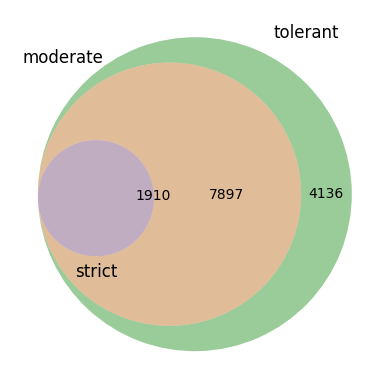

In [16]:
# buildung venn diagram for moderate, tolerant and strict
venn3([moderate_ids, tolerant_ids, strict_ids], set_labels=('moderate', 'tolerant', 'strict'));

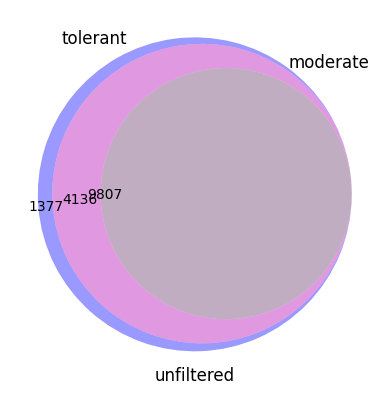

In [17]:
# buildung venn diagram for tolerant, moderate and unfiltered
venn3([tolerant_ids, moderate_ids, unfiltered_ids], set_labels=('tolerant', 'moderate', 'unfiltered'));

### All data is contained in unfiltered.json, all entries in different subdatasets are the same
Subdatasets just provide splits for proteins

In [18]:
# checking, if all entries are the same in the datasets
for entry in strict.keys():
    if strict[entry] != moderate[entry] or strict[entry] != tolerant[entry] or strict[entry] != unfiltered[entry]:
        print(entry)

In [19]:
prot_id = '36025_1_1_1'


In [20]:
print_prot(unfiltered, unfiltered_csv, prot_id)

ID:  36025_1_1_1
entryID:  36025
stID:  1
entity_assemID:  1
entityID:  1
exp_method:  NMR
exp_method_subtype:  SOLUTION
citation_DOI:  
citation_title:  Solution structure of Tilapia piscidin 4, an antimicrobial peptide effective against multidrug resistant Helicobacter pylori

ionic_strength:  0.105
pH:  3.5
temperature:  318.0
off_C:  0.0
off_CA:  0.0
off_CB:  0.0
off_H:  0.0
off_HA:  0.0
off_HB:  0.0
off_N:  0.0
bbshift_positions_post:  23.0
bbshift_types_post:  3.0
total_bbshifts:  65.0
    seq_index seq  k  zscores  pscores   C  CA  CB      HA      H   N      HB
0           1   F  2      NaN      NaN NaN NaN NaN     NaN    NaN NaN     NaN
1           2   I  5   7.1754   0.0594 NaN NaN NaN  3.8880    NaN NaN  1.8930
2           3   H  8   8.7949   0.0733 NaN NaN NaN  4.4340  8.585 NaN  3.1560
3           4   H  9   8.6430   0.1185 NaN NaN NaN  4.6300  8.419 NaN  3.2540
4           5   I  9   8.1347   0.1560 NaN NaN NaN  3.9070  8.060 NaN  1.9400
5           6   I  8   6.6576   0.2

In [23]:
prostt5 = h5py.File("data/disorder/embeddings/prostt5.h5", "r")
prostt5_np = np.array(prostt5)


<HDF5 file "prostt5.h5" (mode r)>

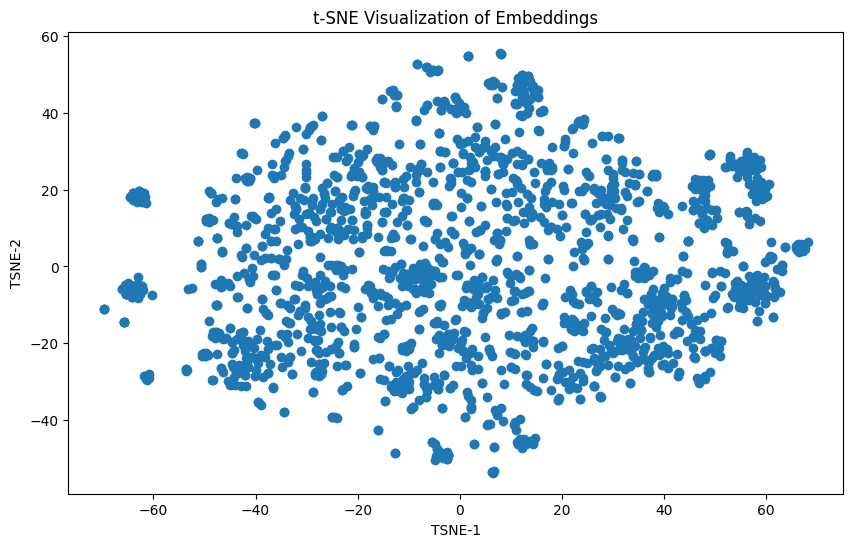

In [58]:
# Load the data
prostt5 = h5py.File("data/disorder/embeddings/prostt5.h5", "r")

# Averaging the embeddings
averaged_embeddings = []
indices = []  # To keep track of the indices

for key in prostt5.keys():
    if key not in strict_ids:
        continue
    embedding = np.array(prostt5[key])
    averaged_embedding = np.mean(embedding, axis=0)  # Average along the amino acids
    averaged_embeddings.append(averaged_embedding)
    indices.append(key)

# Convert to a numpy array
averaged_embeddings_np = np.array(averaged_embeddings)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(averaged_embeddings_np)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title("t-SNE Visualization of Embeddings")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.show()


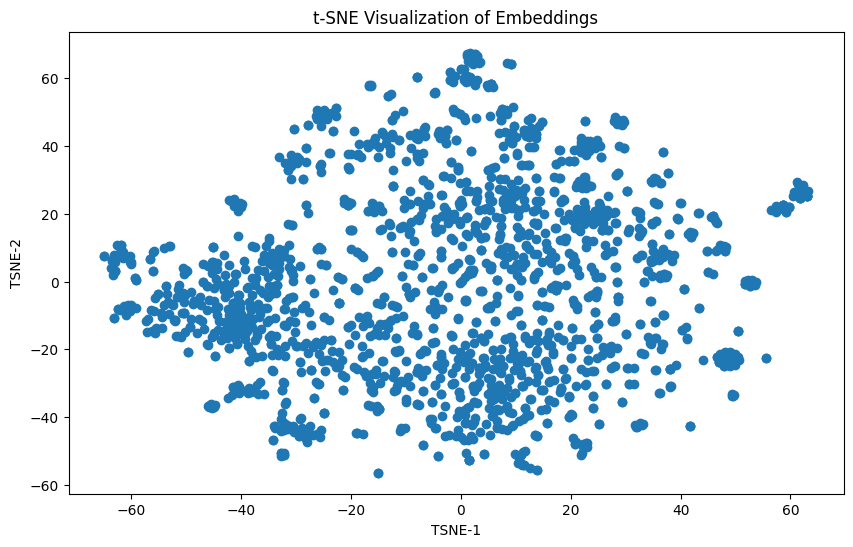

In [62]:
# Load the data
prott5_embs = h5py.File("data/disorder/embeddings/unfiltered_all_prott5.h5", "r")

# Averaging the embeddings
averaged_embeddings = []
indices = []  # To keep track of the indices

for key in prott5_embs.keys():
    if key not in strict_ids:
        continue
    embedding = np.array(prott5_embs[key])
    averaged_embedding = np.mean(embedding, axis=0)  # Average along the amino acids
    averaged_embeddings.append(averaged_embedding)
    indices.append(key)

# Convert to a numpy array
averaged_embeddings_np = np.array(averaged_embeddings)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(averaged_embeddings_np)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title("t-SNE Visualization of Embeddings")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.show()